<a href="https://colab.research.google.com/github/Th0m5s/CyberCodeOnline/blob/master/tp7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>Ouvrir le notebook dans Colab en modifiant le début de son adresse dans le navigateur :<br>
il faut remplacer **github.com** par **githubtocolab.com**.<br>
Une fois vos réponses apportées, le notebook devra être sauvegardé dans GitHub, dans le repository du TP :<br>
*Fichier > Enregistrer une copie dans Github*<br>
*Info-TSI-Vieljeux/tpx-votre_nom*<br>

---

# Tableau de pixels et images

## Importer une image

PIL (python imaging library) est l'une des librairies Python permettant de manipuler des fichiers image. On va l'utiliser en association avec numpy qui est le module de choix pour jouer avec des tableaux numériques.

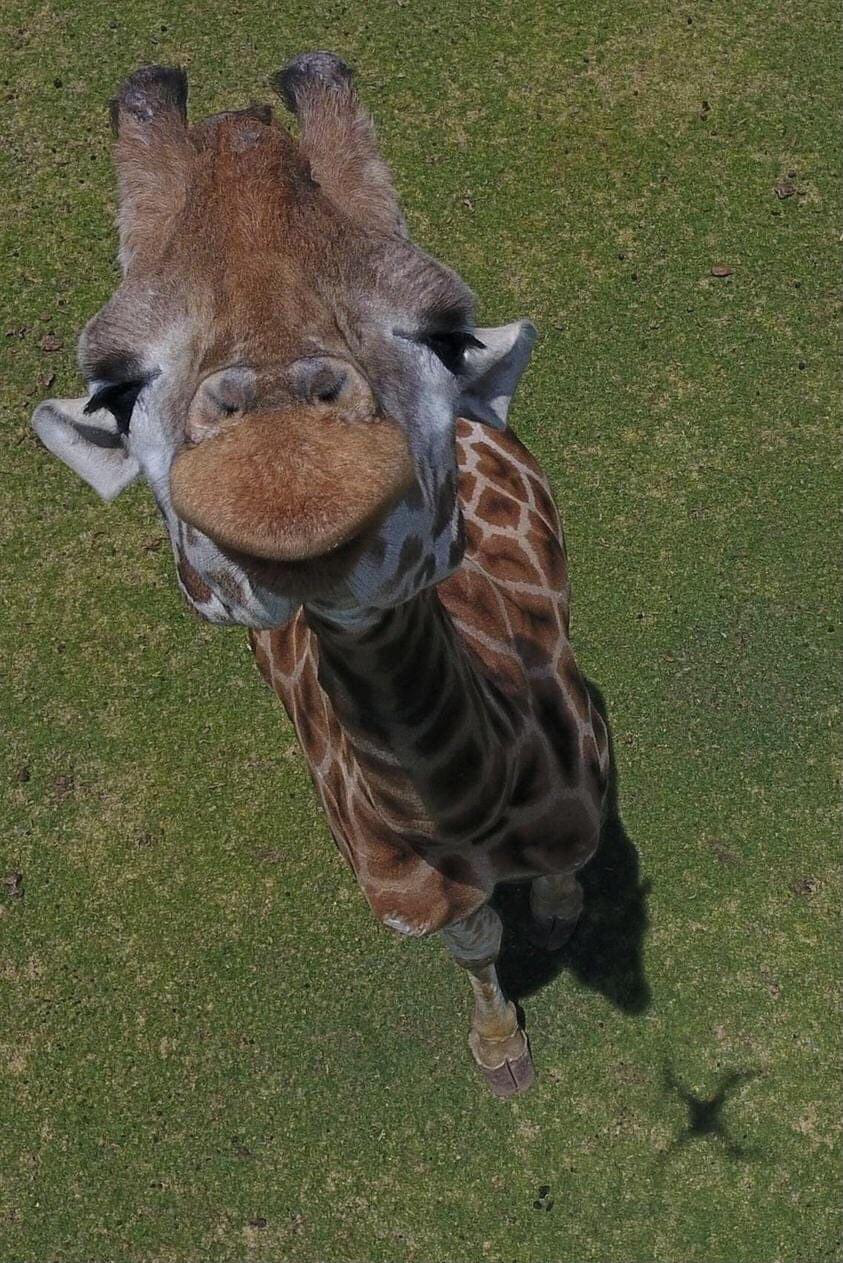

In [1]:
from PIL import Image
import urllib.request # pour récupérer une image sur le web
from IPython.display import display # pour afficher dans le notebook
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (15,10)

urllib.request.urlretrieve('https://i.redd.it/quqjmqmi44q51.jpg', 'girafe') # récupération du fichier image
image_girafe = np.array(Image.open('girafe')) # l'image est convertie en un tableau numpy
girafe = Image.fromarray(image_girafe) # le tableau est converti en un objet image
display(girafe) # affichage

On a récupéré les données de l'image dans un tableau à trois dimensions numpy. 

Les deux premières dimensions correspondent aux coordonnées spatiales du pixel.<br>
L'indexation d'un tableau numpy autorise l'utilisation de virgules pour imiter les coordonnées mathématiques (mais les x et les y sont inversés car il s'agit de matrice et on commence toujours par indexer les lignes avant les colonnes). Le pixel ayant la coordonnée cartésienne $(x,y)$ avec une origine $(0,0)$ en haut à gauche va donc correspondre à l'élément `image[y,x]` (on peut aussi, comme avec les listes python, obtenir l'élément via `image[y][x]`).

Et à chacun de ses pixels correspond un tableau de 3 entiers compris entre 0 et 255 codant la couleur du pixel (codage rgb, un nombre pour l'intensité du rouge, un pour l'intensité du vert et le dernier pour le bleu). C'est la 3<sup>e</sup> dimension du tableau.

In [2]:
print(image_girafe.shape)

(1263, 843, 3)


In [3]:
hauteur, largeur, _ = image_girafe.shape
print(f'largeur : {largeur} pixels, hauteur : {hauteur} pixels')

largeur : 843 pixels, hauteur : 1263 pixels


In [4]:
print(image_girafe[20,700])
print(image_girafe[20][700])

[96 96 60]
[96 96 60]


## Codage RGB

RGB pour Red Green Blue (RVB en français) est un système de codage informatique des couleurs. Il repose sur la synthèse additive et suit donc le même principe que le codage des couleurs dans notre cerveau à partir des signaux envoyés par trois cellules spécialisées tapissant nos rétines, les cones, chacune ayant un spectre d'absorption centré sur les longueurs d'onde correspondantes à l'une des trois couleurs, rouge, vert ou bleu.

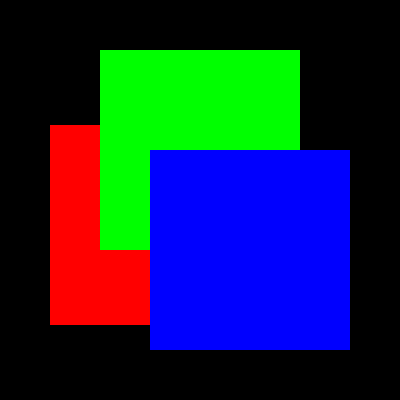

In [5]:
longueur = 400
synthese = np.zeros([longueur, longueur, 3], dtype=np.uint8) 
# création d'un tableau de dimension 3 (2 dimensions spatiales + la couleur) dont les entrées sont des entiers non signés codés sur 8 bits
taille = longueur//2
x1,y1 = longueur//8,5*longueur//16
x2,y2 = longueur//4,longueur//8
x3,y3 = 3*longueur//8,3*longueur//8
synthese[y1:y1+taille,x1:x1+taille] = [255, 0, 0]
synthese[y2:y2+taille,x2:x2+taille] = [0, 255, 0]
synthese[y3:y3+taille,x3:x3+taille] = [0, 0, 255]
affichage = Image.fromarray(synthese)
display(affichage)

En exécutant la cellule précédente, on voit qu'il manque à l'image les zones de superposition.

Modifier le tableau `synthese` pour reproduire celle de l'énoncé.

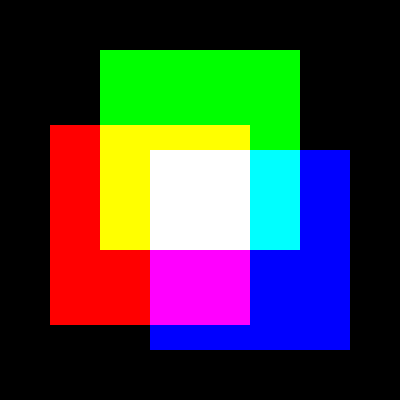

In [6]:
# aide : la ligne suivante ajoute la zone cyan :
synthese[y3:y2+taille,x1+taille:x2+taille] = [0, 255, 255]
synthese[y2+taille:y1+taille,x3:x1+taille] = [255, 0, 255]
synthese[y1:y2+taille,x2:x1+taille] = [255, 255, 0]
synthese[y3:y2+taille,x3:x1+taille] = [255, 255, 255]
# VOTRE CODE
affichage = Image.fromarray(synthese)
display(affichage)

In [7]:
# zone de tests, ne pas modifier

Faisons notre propre expérience physique de synthèse additive en codant des zones où les pixels alternent 2 couleurs primaires :

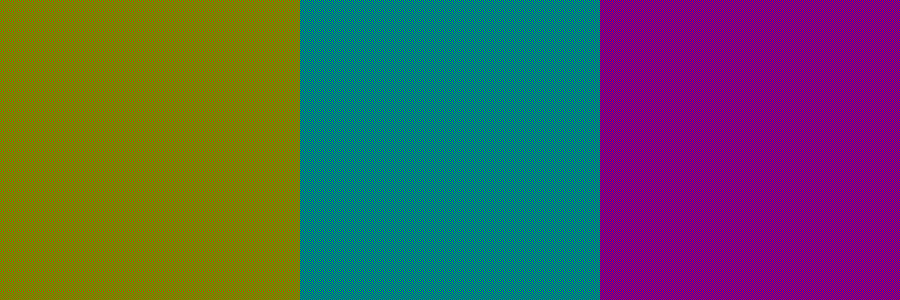

In [8]:
largeur = 900
hauteur = 300
synth_phy = np.zeros([hauteur, largeur, 3], dtype=np.uint8)
# On alterne les pixels rouges et verts dans cette partie du tableau
for i in range(hauteur) :
    for j in range(largeur//3) :
        if (i+j)%2 :
            synth_phy[i,j] = [255,0,0]
        else : 
            synth_phy[i,j] = [0,255,0]
# On alterne les pixels verts et bleus dans cette partie du tableau
for i in range(hauteur) :
    for j in range(largeur//3,2*largeur//3) :
        if (i+j)%2 :
            synth_phy[i,j] = [0,0,255]
        else : 
            synth_phy[i,j] = [0,255,0]
# On alterne les pixels rouges et bleus dans cette partie du tableau
for i in range(hauteur) :
    for j in range(2*largeur//3,largeur) :
        if (i+j)%2 :
            synth_phy[i,j] = [0,0,255]
        else : 
            synth_phy[i,j] = [255,0,0]
synth_phy = Image.fromarray(synth_phy)
display(synth_phy)

Récupérons les composantes bleues, vertes et rouges de la photo de girafe :

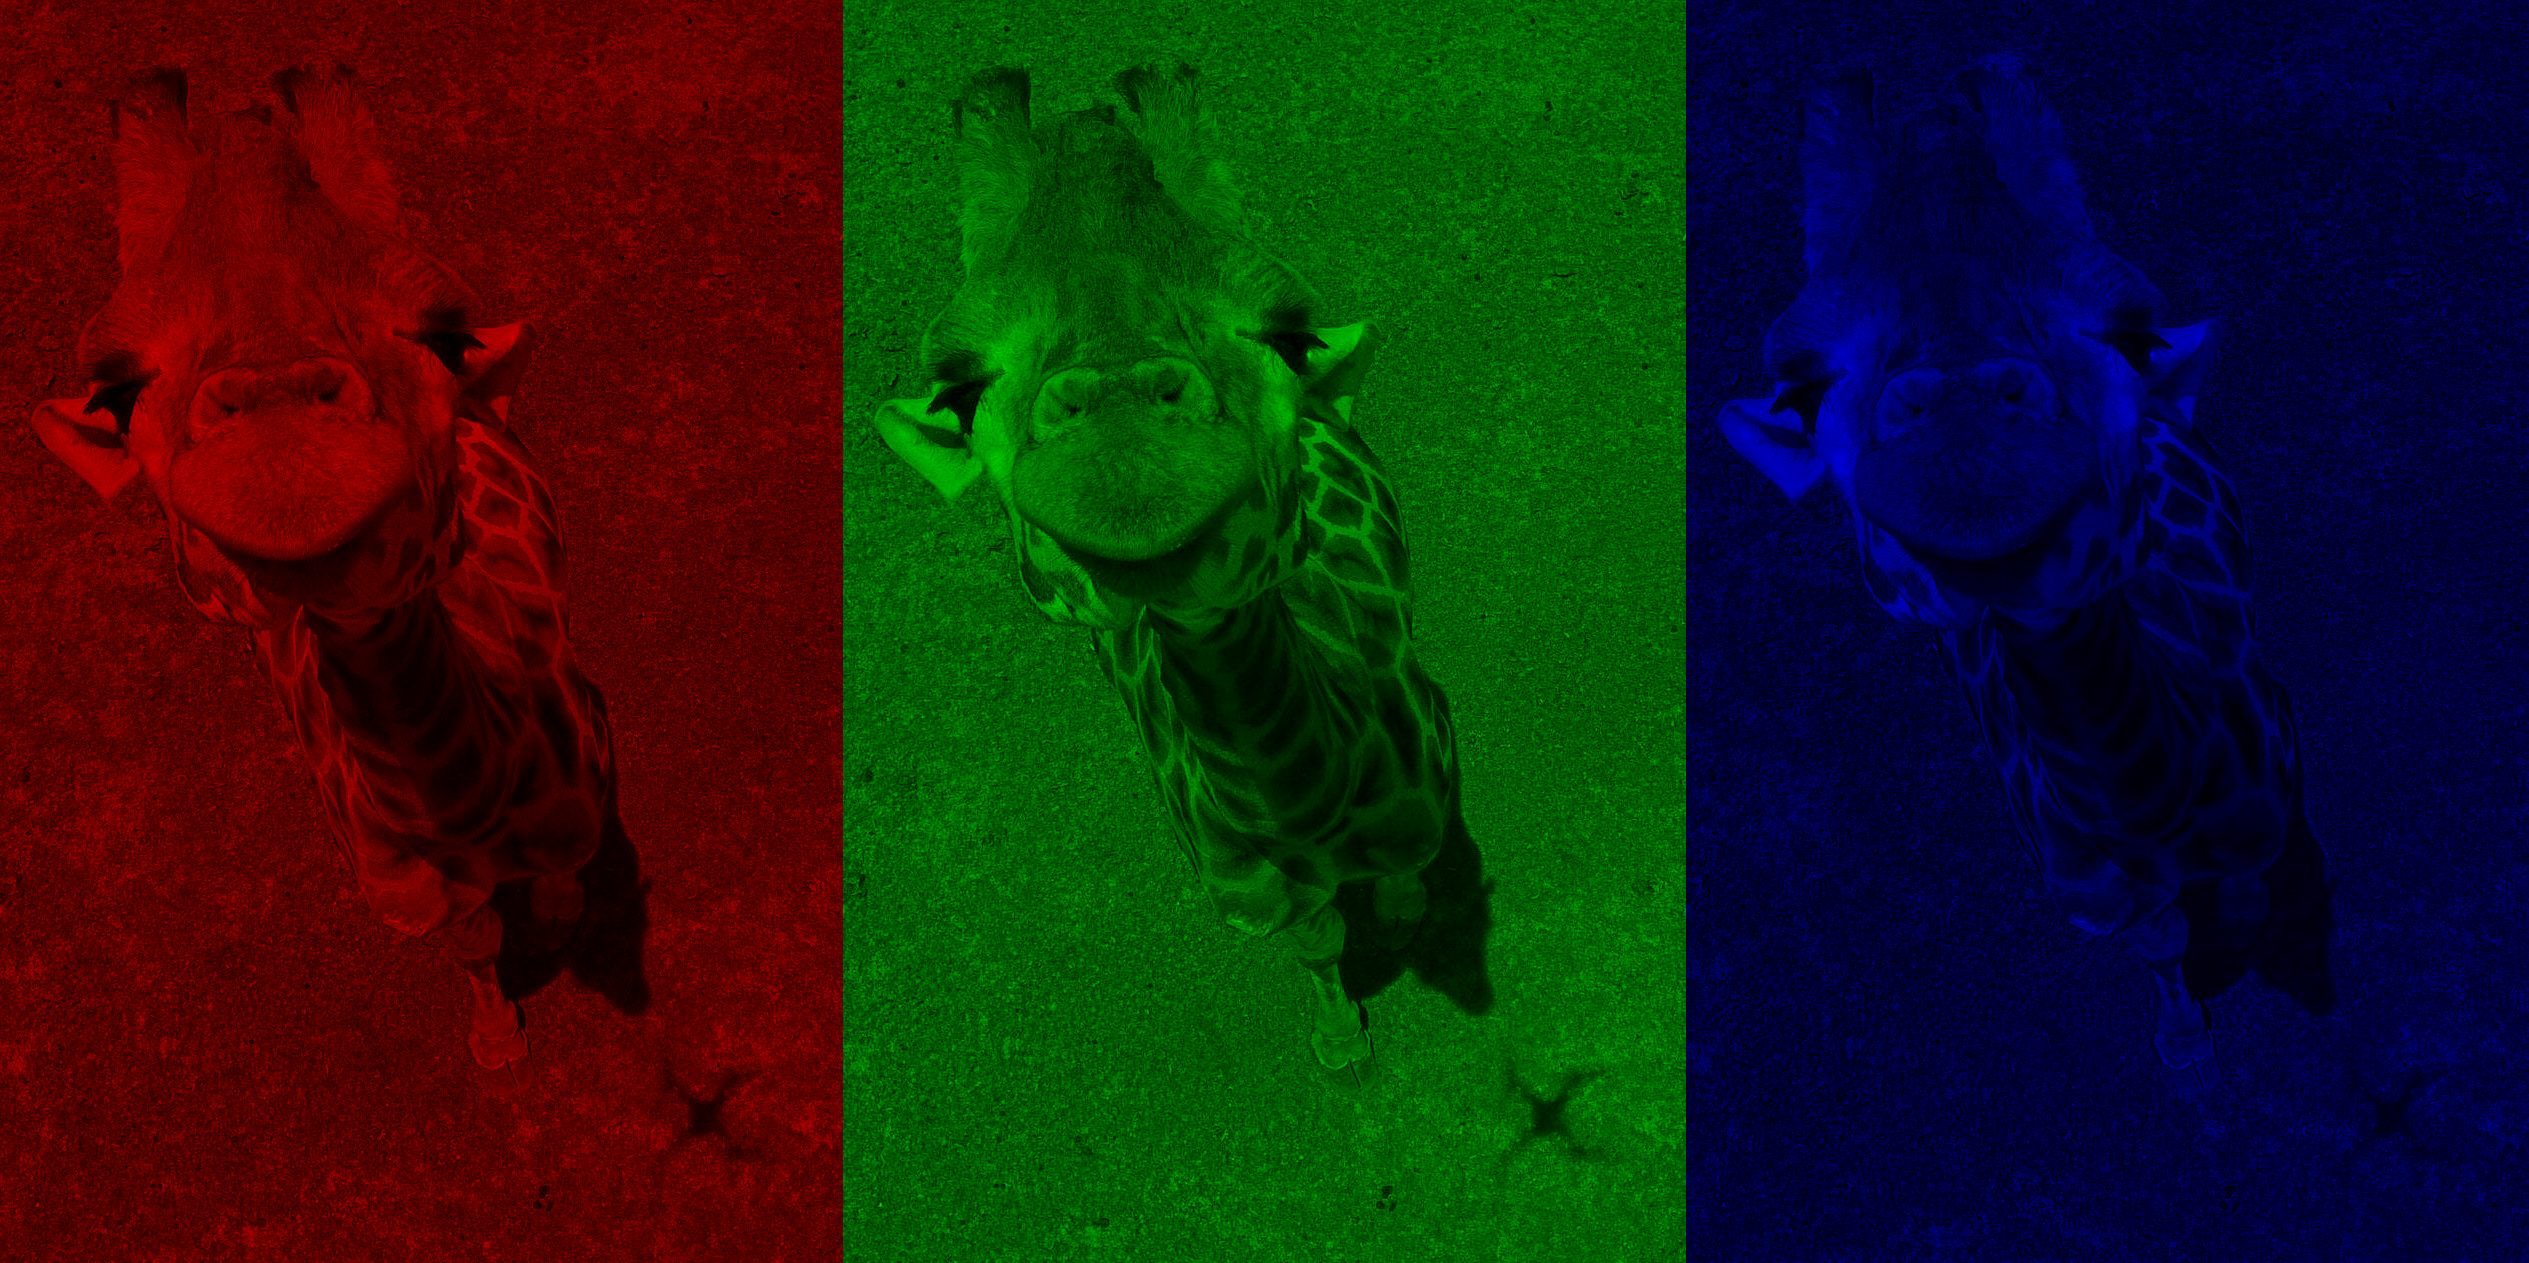

In [9]:
image_R = image_girafe.copy()
image_R[:,:,(1,2)] = 0
# équivalent à :
# for i in range(hauteur) :
#     for j in range(largeur) :
#         image_R[i][j][1] = 0
#         image_R[i][j][2] = 0
image_G = image_girafe.copy()
image_G[:,:,(0,2)] = 0
image_B = image_girafe.copy()
image_B[:,:,(0,1)] = 0

rvb = np.concatenate((image_R, image_G, image_B), axis=1)
rvb = Image.fromarray(rvb)
display(rvb)

La superposition des trois filtres reproduit les couleurs d'origine.

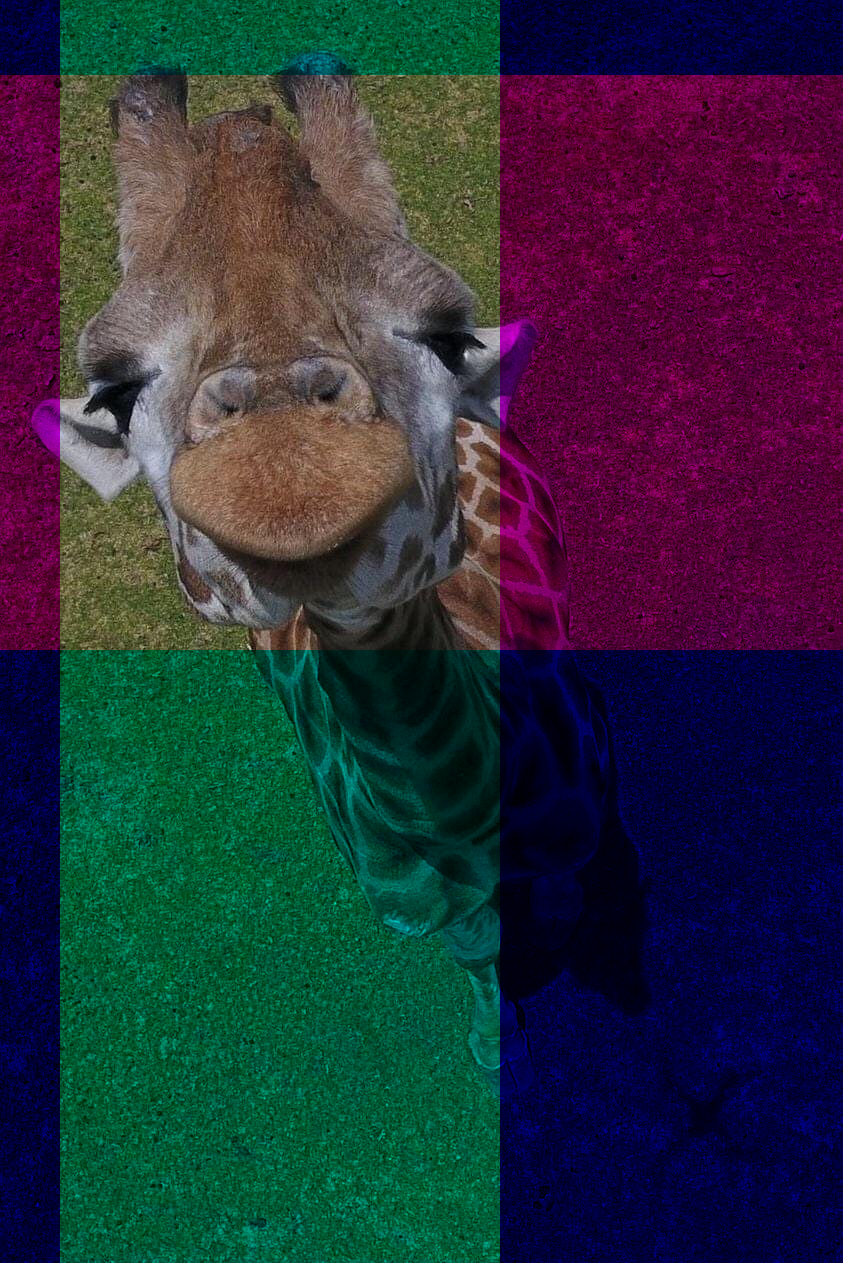

In [10]:
image_rec = image_B.copy()
image_rec[:,60:500] += image_G[:,60:500]
image_rec[75:650,:] += image_R[75:650,:]
image_rec = Image.fromarray(image_rec)
display(image_rec)

Dans le codage RGB utilisé aujourd'hui, l'intensité de chacune des 3 couleurs primaires est codée sur un octet (8 bits), ce qui permet une profondeur de 24 bits pour différentier les couleurs.<br>
Combien de couleurs sont alors représentables par ce système ?

In [15]:
# Modifiez l'entier affecté à la variable `nb_couleurs` pour qu'il corresponde à votre réponse :
nb_couleurs = 256

In [12]:
# zone de tests, ne pas modifier

Fabriquons une image contenant toutes ces couleurs !

L'idée est de fabriquer d'abord une image $256\times 256$ contenant toutes les nuances possibles de vert et rouge, de l'agrandir d'un facteur 16 de manière à qu'une combinaison rouge/vert unique corresponde à un gros pixel de $16\times16$. Et on additionne à chacun de ces gros pixels une image $16\times16$ bleu contenant les 256 teintes de bleu disposées en spirale.

![](http://cordier-phychi.toile-libre.org/Info/github/rougevertetspir.png)

L'image rouge/verte est assez simple à coder (l'exécution met un peu de temps) :

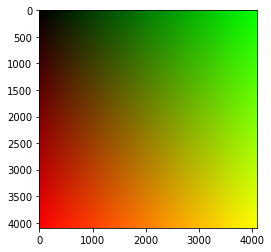

In [13]:
L1 = 4096
rougevert = np.zeros([L1, L1, 3], dtype=np.uint8)
for r in range(256*16) :
    for g in range(256*16) :
        rougevert[r,g]=[r//16,g//16,0]
plt.imshow(rougevert)

Fabriquer la spirale bleue est plus dur...<br> 
L'image doit faire $16\times16$ et contenir toutes les nuances de bleu. On commence en haut à gauche (x=0 et y=0) par du noir (0,0,0), et on progresse dans le sens des aiguilles d'une montre en ajoutant 1 à l'intensité du bleu à chaque pixel successif de la spirale pour finir au centre (en position x=7, y=8 pour être précis) par un pixel 100% bleu (0,0,255).

Il reste une ligne à compléter dans le code suivant construisant le tableau permettant de représenter la spirale bleue. À vous de jouer...

In [59]:
L2 = 16
bleu = np.zeros([L2, L2, 3], dtype=np.uint8)
liste1 = [L2]
for i in range(1,L2) :
    liste1 += [L2-i]*2
# liste1 = [16, 15, 15, 14, 14, 13, 13, 12, 12, 11, 11, 10, 10, 9, 9, 8, 8, 7, 7, 6, 6, 5, 5, 4, 4, 3, 3, 2, 2, 1, 1]
liste2 = [0]
s = 0
for e in liste1 :
    s += e
    liste2 += [s]
# liste2 = [0, 16, 31, 46, 60, 74, 87, 100, ..., 252, 254, 255, 256]
k = 0
for i in range(0,len(liste2),4) :
    #bleu[k,k:L2-k,2] = np.arange(liste2[i],liste2[i+1])
    # bleu[i,j,2] indexe la couleur bleue
    # np.arange(a,b) fournit un tableau des entiers consécutifs de a (inclus) à b (exclu)
    bleu[2,L2-1:L2-1-k,2] = np.arange(liste2[i+1],liste2[i+2])
    #bleu[L2-1-k,k:L2-1-k,2] = np.arange(liste2[i+2],liste2[i+3])[::-1]
    #if i != 28 :
        #bleu[k+1:L2-1-k,k,2] = np.arange(liste2[i+3],liste2[i+4])[::-1]
    k += 1
plt.imshow(bleu)

ValueError: ignored

In [61]:
# zone de tests, ne pas modifier

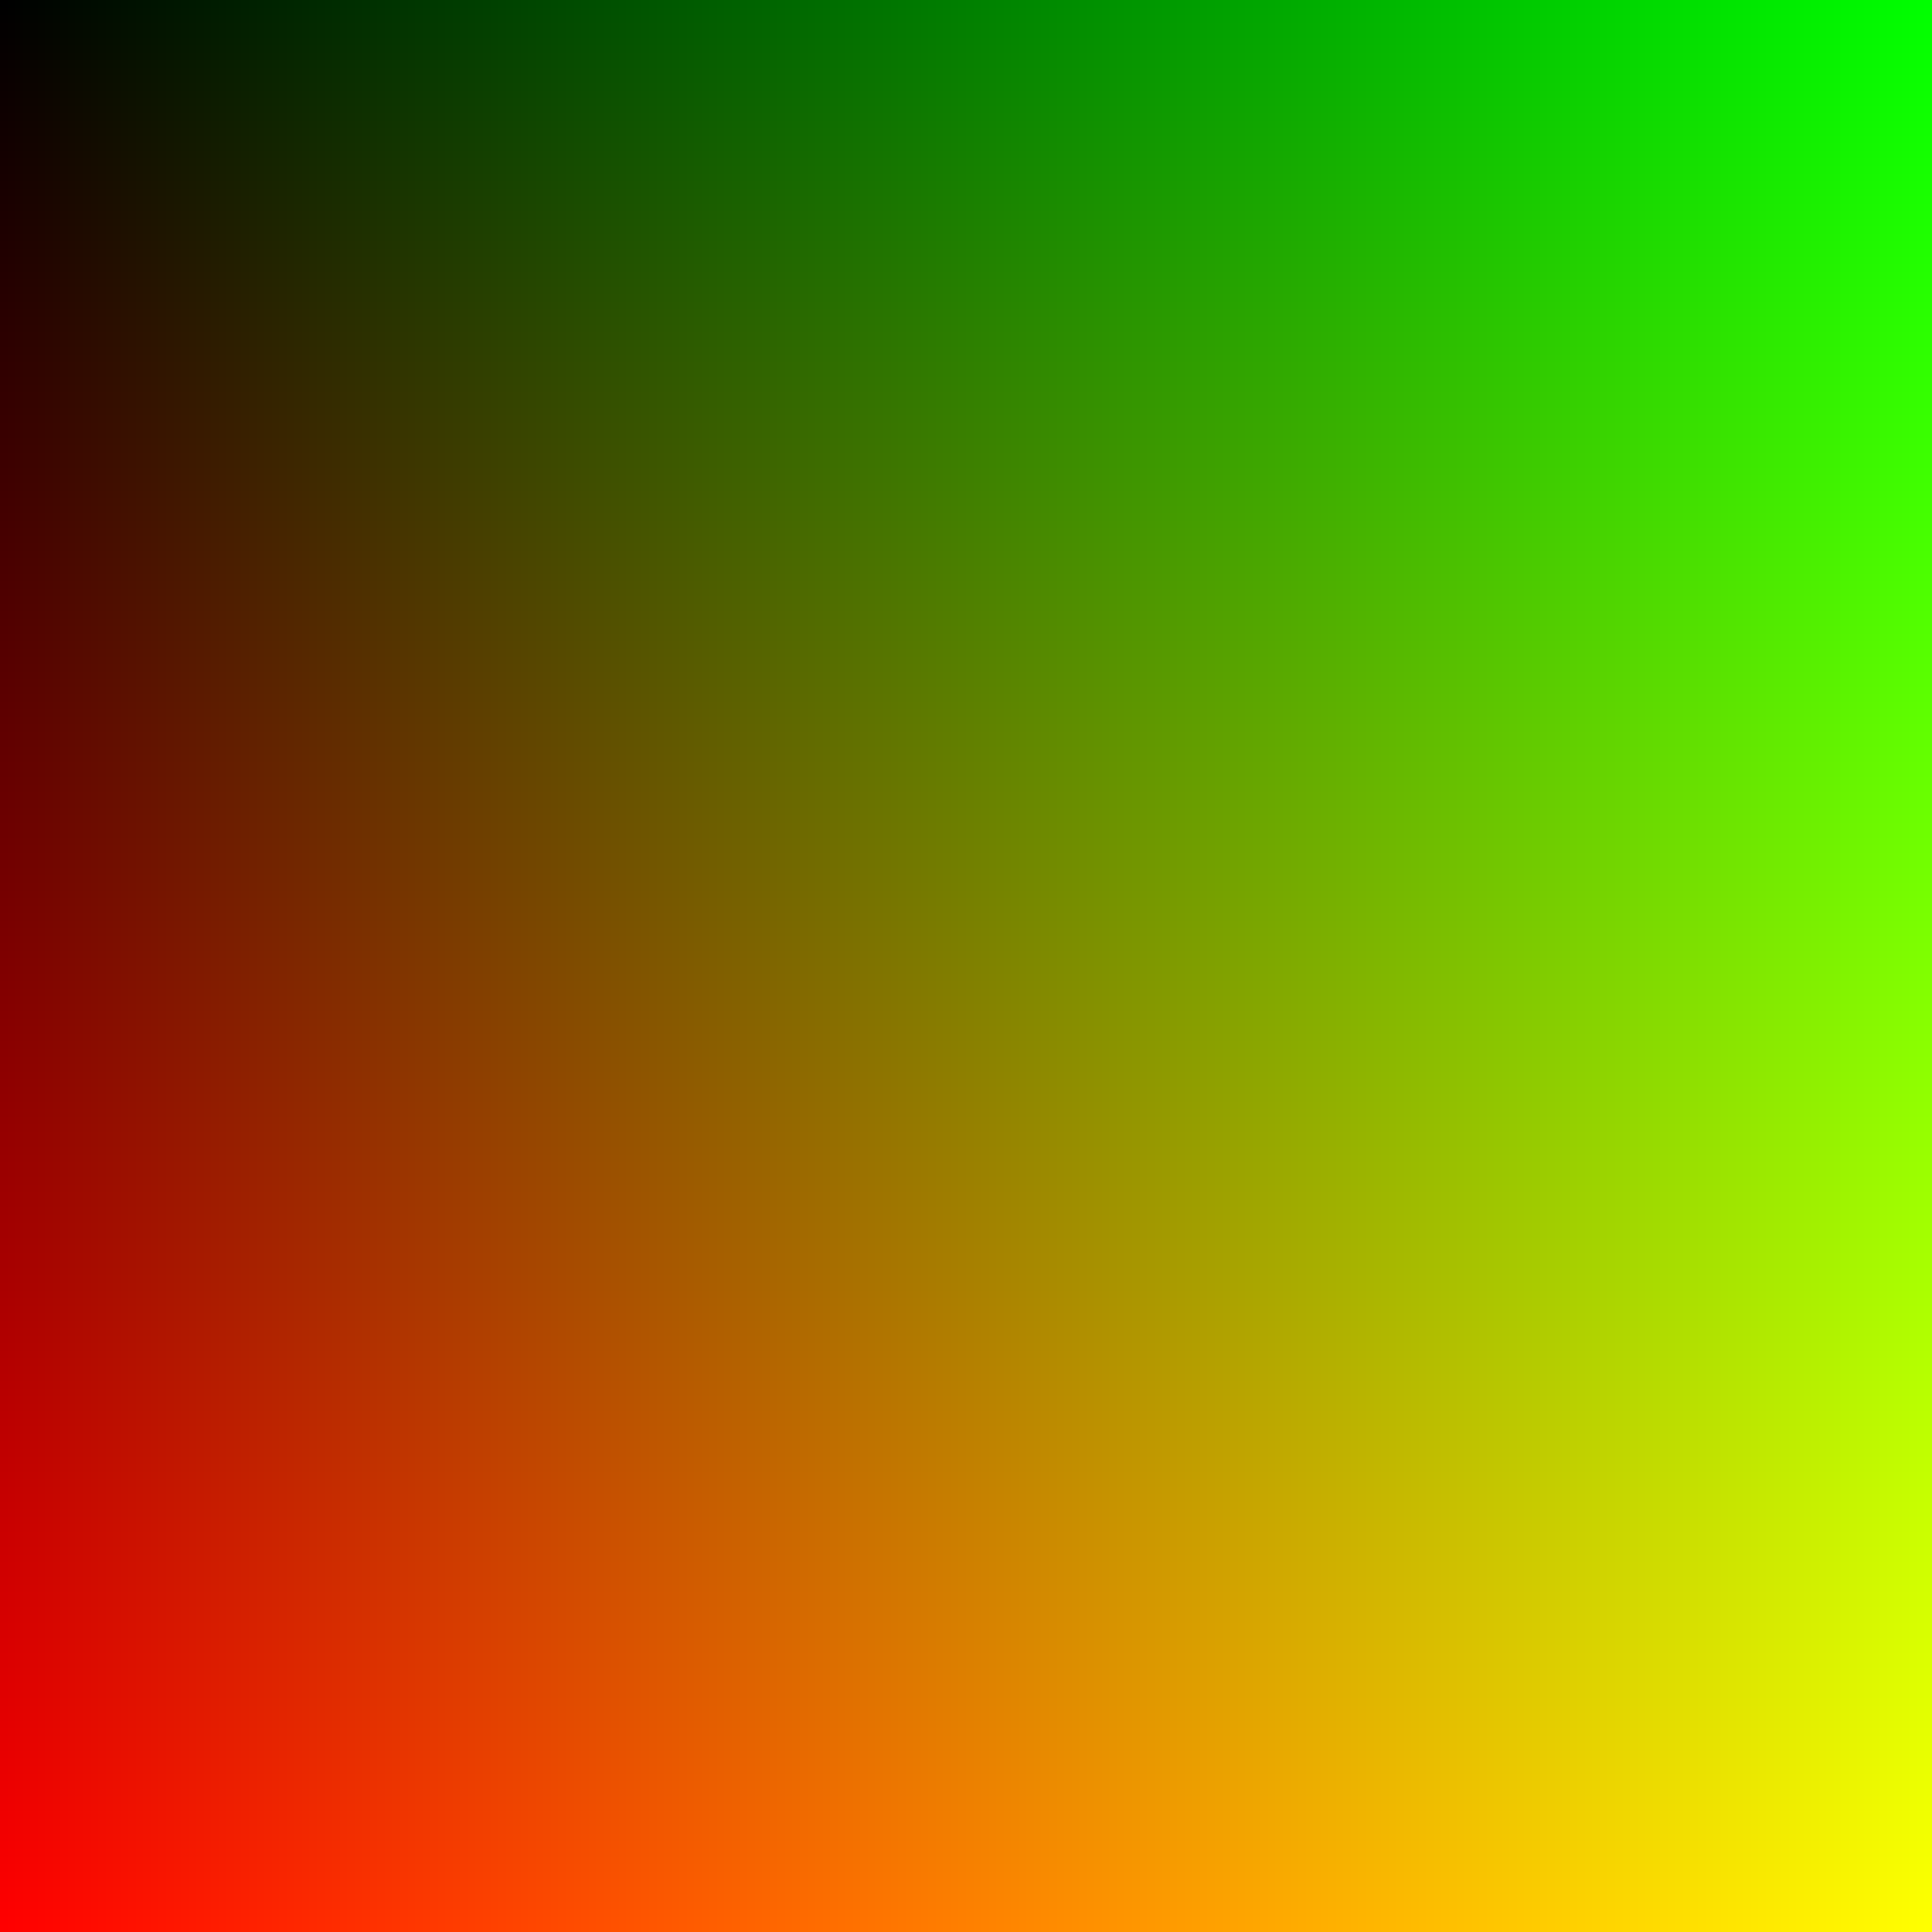

In [60]:
longueur = 4096
rougevertbleu = np.zeros([longueur, longueur, 3], dtype=np.uint8)
for i in range(0,4096,16) :
    for j in range(0,4096,16) :
        rougevertbleu[i:i+16,j:j+16] = rougevert[i:i+16,j:j+16]+bleu
rougevertbleu = Image.fromarray(rougevertbleu)
display(rougevertbleu)

Les premières consoles de jeu avaient des graphismes de 6 bits (de profondeur). Plutôt que 256 possibilités pour chaque sous-pixel, on en était réduit à seulement 4 choix (2 bits).

![](https://d3isma7snj3lcx.cloudfront.net/optim/images/gallery/26/26635/super-mario-bros-nes-155dee7e__930_250__86-619-1680-1050.jpg)

Définissez une fonction permettant de convertir l'image de la girafe en 6 bits.

In [ ]:
def sixbit(image) :
    """
    prend en argument un tableau numpy à 3 dimensions permettant de représenter une image couleur 24 bits
    et renvoie un nouveau tableau de mêmes dimensions correspondant à une conversion en 6 bits de l'image (chacune des 3 couleurs doit maintenant n'avoir que 4 valeurs d'intensité possibles uniformément réparties).
    """
    

In [ ]:
girafe = Image.fromarray(sixbit(image_girafe))
display(girafe)

In [ ]:
# zone de tests, ne pas modifier

On peut très facilement inverser les couleurs de l'image. Une ligne suffit :

In [ ]:
image_inv = 255-image_girafe
image_inv = Image.fromarray(image_inv)
display(image_inv)

Complétez la fonction `NB` qui retourne une version "niveau de gris" de l'image donnée en argument.

Principe de la manœuvre : $(r,g,b)\rightarrow (\frac{r+g+b}{3},\frac{r+g+b}{3},\frac{r+g+b}{3})$

In [ ]:
def NB(image) :
    """
    prend en argument un tableau numpy à 3 dimensions (hauteur,largeur,3) représentant une image
    et renvoie un nouveau tableau correspondant à une conversion en niveau de gris de l'image.
    """
    hauteur, largeur, _ = image.shape
    image_NB = np.zeros([hauteur, largeur, 3], dtype=np.uint8)
    # VOTRE CODE
    return image_NB

In [ ]:
girafe_NB = Image.fromarray(NB(image_girafe))
display(girafe_NB)

In [ ]:
# zone de tests, ne pas modifier

## Transformation d'une image

Construisez une fonction `recadrage` qui prend en argument l'image à recadrer, les coordonnées du coin supérieur gauche du nouveau cadre (sous la forme d'un tuple (x,y)), la largeur et la hauteur du nouveau cadre.<br>
Faites en sorte que `recadrage(image_girafe,(30,50),500,600)` recadre la tête de la girafe comme ci-dessous.
<img src="http://cordier-phychi.toile-libre.org/Info/github/recadrage.png" width="800"/>

In [ ]:
def recadrage(image,xy_coin,l_cadre,h_cadre) :
    """
    prend en argument un tableau numpy à 3 dimensions (hauteur,largeur,3) représentant une image
    et renvoie un nouveau tableau à 3 dimensions (h_cadre,l_cadre,3).
    xy_coin est un tuple (x,y) où x et y sont des entiers correspondants aux coordonnées du coin supérieur gauche du nouveau cadre.
    l_cadre et h_cadre étant des nombres de pixels, ils doivent être entiers.
    """
    # VOTRE CODE

In [ ]:
affichage = Image.fromarray(recadrage(image_girafe,(30,50),500,600))
display(affichage)

In [ ]:
# zone de tests, ne pas modifier

Complétez ensuite la fonction `rotation` qui tourne l'image de 90° vers la gauche en modifiant la disposition des pixels.

In [ ]:
def rotation(image) :
    """
    prend en argument un tableau numpy à 3 dimensions (hauteur,largeur,3) représentant une image
    et renvoie un nouveau tableau correspondant à l'image tournée de 90° vers la gauche.
    """
    hauteur, largeur, _ = image.shape
    image_tourne = np.zeros([largeur, hauteur, 3], dtype=np.uint8)
    # VOTRE CODE
    return image_tourne

In [ ]:
affichage = Image.fromarray(rotation(image_girafe))
display(affichage)

In [ ]:
# zone de tests, ne pas modifier

On peut aussi s'amuser avec les symétries :

In [ ]:
hauteur, largeur, _ = image_girafe.shape
image_sym = np.copy(image_girafe)
for i in range(min(hauteur,largeur)) :
    for j in range(min(hauteur,largeur)) :
        image_sym[i][j]=image_sym[j][i]
affichage = Image.fromarray(image_sym)
display(affichage)

## Traitement d'image (filtrage)

On va maintenant passer à des traitements plus évoluées : 
- flou
- amélioration de la netteté
- détection des contours

Elles reposent sur des convolutions dont la recette est la suivante :
- une petite matrice, la matrice de convolution, appelée **noyau**, est choisie,
- on balaye l'image à traiter avec un cadre ayant la taille de la matrice,
- à l'intérieur du cadre, on multiplie chacune des valeurs d'intensité des pixels par le coefficient correspondant de la matrice,
- on somme tous ces produits et on attribue la valeur au pixel au centre du cadre,
- on obtient ainsi une nouvelle matrice image correspondant à la convolution de l'image par le noyau.

Suivant le noyau utilisé, on va modifier l'image de différentes façons.

![](http://cordier-phychi.toile-libre.org/Info/github/convol.gif)

La fonction suivante permet de calculer rapidement le produit de convolution lorsque le noyau est une matrice $3\times 3$.

In [ ]:
def conv(M,N) :
    """
    M est la grande matrice (l'image)
    N est la petite matrice (le noyau)
    """
    h = len(M)
    l = len(M[0])
    taille = len(N)
    marge = (taille-1)
    C = np.zeros((h-marge, l-marge))
    for i in range(taille) :
        for j in range(taille) :
            C += N[i,j]*M[i:h-marge+i,j:l-marge+j]
    return C

In [ ]:
M = np.array([[2,2,2,2,2,2],
              [2,1,1,1,2,2],
              [2,1,3,4,2,2],
              [2,1,2,1,2,2],
              [2,2,3,2,2,2]])

N = np.array([[1,0,1],
              [0,2,0],
              [1,0,1]])
# Rq : on peut très bien écrire ces matrices en une ligne, on ne va ici à la ligne que pour améliorer la clarté.
# N = np.array([[1,0,1],[0,2,0],[1,0,1]])

C = conv(M,N)
print(C)

Que valent les éléments $c_{kl}$ de la matrice $C$ donnée par `conv(M,N)` lorsque N est une matrice $3 \times 3$ ?
- a : $\sum_{i=1}^{3}m_{ki}n_{il}$
- b : $\sum_{i=1}^{3}\sum_{j=1}^{3}m_{(k-1+i)(l-1+j)}n_{ij}$ 
- c : $\sum_{i=1}^{3}\sum_{j=1}^{3}m_{(k-i+1)(l-j+1)}n_{kl}$ 

In [ ]:
# Affectez à la variable rep le caractère correspondant à votre réponse parmi 'a', 'b' ou 'c' :
rep = 'd'

In [ ]:
# zone de tests, ne pas modifier

### Floutage

Pour flouter, l'idée va être de moyenner la valeur des pixels à l'intérieur du bloc grâce à un noyau $F$ du type :
$$F=\frac{1}{9}\begin{pmatrix}1&1&1\\1&1&1\\1&1&1\end{pmatrix}$$
Cela revient à passer l'image dans un filtre passe-bas (= un moyenneur). En effet, la valeur de l'intensité d'un pixel sera maintenant une moyenne entre tous ses voisins.<br>
Plus la matrice $F$ sera grande et plus la fenêtre de moyennage sera grande et donc plus l'effet de flou sera intense.

On va ainsi pouvoir contrôler l'intensité du floutage en liant la taille de la matrice $F$ au paramètre `force`.

In [ ]:
def flou(image,force) :
    """
    flou(image,intensite_flou)->image_floue
    image doit être un tableau dimension d'entier non signés codés sur 8 bits
    intensité_flou est un entier >= 1
    image_floue est du même type qu'image
    """
    taille = 2*force+1 # taille de la matrice F
    F = np.ones((taille,taille))*1/taille**2  # matrice pour la convolution
    image_floue = image.copy()
    hauteur,largeur = image_floue.shape
    marge = (taille-1)//2
    image_floue[marge:-marge,marge:-marge] = conv(image,F)
    image_floue = image_floue.astype(np.uint8)
    return image_floue

In [ ]:
urllib.request.urlretrieve('https://fichier0.cirkwi.com/image/photo/poi/800x500/545297/fr/0.jpg', 'LaR')
image_LR = np.array(Image.open('LaR'))
hauteur,largeur,_ = image_LR.shape
LaR = np.zeros([hauteur, largeur]) 
# on associe maintenant à chaque pixel un seul chiffre : l'intensité de gris (entre 0 et 255)
LaR = NB(image_LR)[:,:,0] # il suffit de récupérer une des 3 couleurs de la conversion en niveau de gris de l'image
affichage = Image.fromarray(LaR)
display(affichage)

In [ ]:
LaR_floues = (LaR,)  # un singulet nécessite cette petite virgule pour être reconnu comme tel
for i in range(1,5) :
    LaR_floues += (flou(LaR,i),)
comparaison = np.concatenate(LaR_floues, axis=1)
affichage = Image.fromarray(comparaison)
display(affichage)

Les matrices F utilisées dans les 4 images floutées :<br>
$\frac{1}{9}\begin{pmatrix}1&1&1\\1&1&1\\1&1&1\end{pmatrix}$,$\frac{1}{25}\begin{pmatrix}1&1&1&1&1\\1&1&1&1&1\\1&1&1&1&1\\1&1&1&1&1\\1&1&1&1&1\end{pmatrix}$,$\frac{1}{49}\begin{pmatrix}1&1&1&1&1&1&1\\1&1&1&1&1&1&1\\1&1&1&1&1&1&1\\1&1&1&1&1&1&1\\1&1&1&1&1&1&1\\1&1&1&1&1&1&1\\1&1&1&1&1&1&1\end{pmatrix}$ et $\frac{1}{81}\begin{pmatrix}1&1&1&1&1&1&1&1&1\\1&1&1&1&1&1&1&1&1\\1&1&1&1&1&1&1&1&1\\1&1&1&1&1&1&1&1&1\\1&1&1&1&1&1&1&1&1\\1&1&1&1&1&1&1&1&1\\1&1&1&1&1&1&1&1&1\\1&1&1&1&1&1&1&1&1\\1&1&1&1&1&1&1&1&1\end{pmatrix}$<br>

### Amélioration de la netteté

On ne veut maintenant plus moyenner, mais au contraire accentuer les différences (cela revient à passer l'image dans un filtre passe-haut).<br>
Pour cela, on choisit un noyau $N$ qui récompense les variations entre pixels voisins et est sans effet dans les zones de mêmes teintes :
$$N=\begin{pmatrix}0&-1&0\\-1&5&-1\\0&-1&0\end{pmatrix}$$

Complétez l'instruction manquante dans la définition de la fonction `net` qui renvoie le résultat d'une image convoluée par $N$.

In [ ]:
def net(image) :
    """
    net(image)->image_nette
    """
    image = image.astype(np.int32)
    # VOTRE CODE
    image_nette = conv(image,N)
    # on fixe les valeurs qui ont dépassé 255 à 255 et celles sous 0 à 0.
    image_nette[image_nette<0] = 0
    image_nette[image_nette>255] = 255
    image_nette = image_nette.astype(np.uint8) 
    return image_nette

In [ ]:
LaR_nette = net(LaR_floues[1])
comparaison = np.concatenate((LaR_floues[1][1:-1,1:-1],LaR_nette), axis=1)
affichage = Image.fromarray(comparaison)
display(affichage)

In [ ]:
# zone de tests, ne pas modifier

### Détection de contour (filtre de Sobel)

On va agir en deux temps, grâce à deux noyaux.<br>
L'un, $S_x$, va donner des valeurs d'autant plus loin de $0$ qu'il y a un fort gradient horizontal d'intensité dans le bloc $3\times3$ de l'image inspectée.<br>
Et l'autre, $S_y$, va mettre en valeur les gradients verticaux.<br>
$S_x = \begin{pmatrix}-1&0&1\\-2&0&2\\-1&0&1\end{pmatrix}$ et $S_y = \begin{pmatrix}1&2&1\\0&0&0\\-1&-2&-1\end{pmatrix}$<br>
$S_x$ fait la différence entre les voisins de droite et ceux de gauche quand $S_y$ fait la différence entre les voisins du dessus et ceux de dessous.

In [ ]:
def grad_x(image) :
    image = image.astype(np.int32)
    Sx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    image_gradx = conv(image,Sx)
    # les gradients peuvent très bien être négatifs. On translate alors toutes les valeurs pour que la plus basse soit zéro.
    image_gradx = image_gradx - np.min(image_gradx)
    # on normalise ensuite en faisant en sorte que la plus haute valeur vaille 255
    image_gradx = image_gradx/np.max(image_gradx)*255
    image_gradx = image_gradx.astype(np.uint8)
    return image_gradx

Écrivez la fonction `grad_y` sur le même modèle :

In [ ]:
def grad_y(image) :
    # VOTRE CODE

In [ ]:
Gx = grad_x(LaR)
Gy = grad_y(LaR)
comparaison = np.concatenate((Gx,Gy), axis=0)
affichage = Image.fromarray(comparaison)
display(affichage)

In [ ]:
# zone de tests, ne pas modifier

Le gradient global $G$ s'obtient en "pythagorisant" `Gx` et `Gy` : $G=\sqrt{G_x^2+G_y^2}$

Remarque : cela revient finalement à appliquer un filtre passe-haut à l'image.

In [ ]:
def grad(image) :
    Gx = grad_x(image).astype(np.int32)
    Gy = grad_y(image).astype(np.int32)
    image_grad = np.sqrt(Gx**2+Gy**2)
    image_grad = image_grad/np.max(image_grad)*255
    image_grad = image_grad.astype(np.uint8)
    return image_grad

In [ ]:
affichage = Image.fromarray(grad(LaR))
display(affichage)

L'effet de relief est rendu par l'information sur la direction du gradient, information inutile si le contour est tout ce qui nous intéresse (que l'on passe d'une forte intensité à une faible ou l'inverse détecte un contour dans les deux cas).<br>
On va donc reprendre les définitions en utilisant cette fois les valeurs absolues des gradients.

In [ ]:
def grad_abs_x(image) :
    image = image.astype(np.int32)
    Sx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    image_gradx = np.abs(conv(image,Sx))
    image_gradx = image_gradx/np.max(image_gradx)*255
    image_gradx = image_gradx.astype(np.uint8)
    return image_gradx
def grad_abs_y(image) :
    image = image.astype(np.int32)
    Sy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    image_grady = np.abs(conv(image,Sy))
    image_grady = image_grady/np.max(image_grady)*255
    image_grady = image_grady.astype(np.uint8)
    return image_grady
def contour(image) :
    Gx = grad_abs_x(image).astype(np.int32)
    Gy = grad_abs_y(image).astype(np.int32)
    image_cont = np.sqrt(Gx**2+Gy**2)
    image_cont = image_cont/np.max(image_cont)*255
    image_cont = image_cont.astype(np.uint8)
    return image_cont

In [ ]:
affichage = Image.fromarray(contour(LaR))
display(affichage)

Nous partons maintenant de l'image d'un échiquier :

![](http://cordier-phychi.toile-libre.org/Info/github/echiquier.png)

Parmi les images suivantes numérotées de 1 à 4, laquelle est produite par :
- A : `grad_x(echiquier)`
- B : `grad_abs_y(echiquier)`
- C : `contour(echiquier)`
- D : `grad(echiquier)`

<img src="http://cordier-phychi.toile-libre.org/Info/github/echiquiz.png" alt="" width="640"/>

In [ ]:
# Affectez chacune des variables `A`, `B`, `C`, `D` à l'entier `1`,`2`,`3` ou `4` correspondant à la bonne image.
A = 0
B = 0
C = 0
D = 0

In [ ]:
# zone de tests, ne pas modifier

Quand on joue avec des images, les erreurs de code donnent parfois des résultats étonnants. N'hésitez pas à enregistrer/copier vos bizarreries, s'il y en a. Je récompenserai la plus belle/tordue.<br>
Ci-dessous, un échec faisant tomber la pluie sur La Rochelle...
![](http://cordier-phychi.toile-libre.org/Info/github/pluieLR.png)